In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
#


In [2]:
df = pd.read_csv('C:\ML\Diabestes_prediction\data\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Dataset Shape: (768, 9)

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Class Distribution:
 Outcome
0    500
1    268
Name: count, dtype: int64


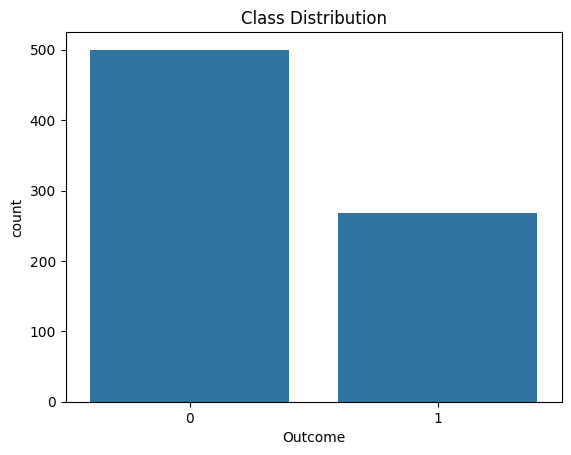

In [3]:
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nClass Distribution:\n", df['Outcome'].value_counts())

sns.countplot(x='Outcome', data=df)
plt.title('Class Distribution')
plt.show()


In [4]:
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[invalid_cols] = df[invalid_cols].replace(0, np.nan)

df.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [5]:
df.fillna(df.median(), inplace=True)

In [6]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


 Model: Logistic Regression
 Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



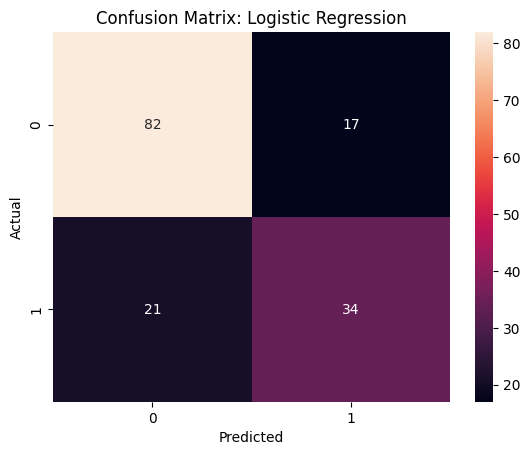

 Model: Random Forest
 Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        99
           1       0.62      0.69      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



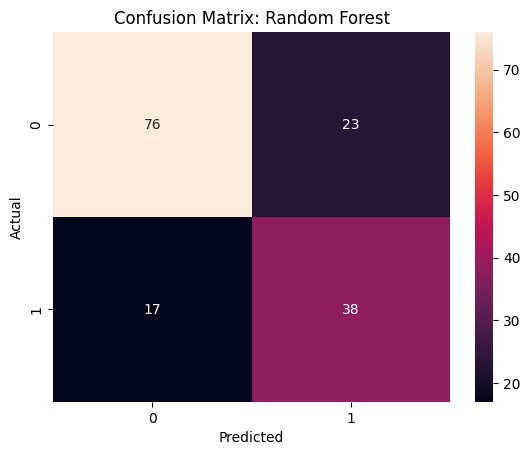

 Model: Support Vector Machine
 Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        99
           1       0.67      0.58      0.62        55

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



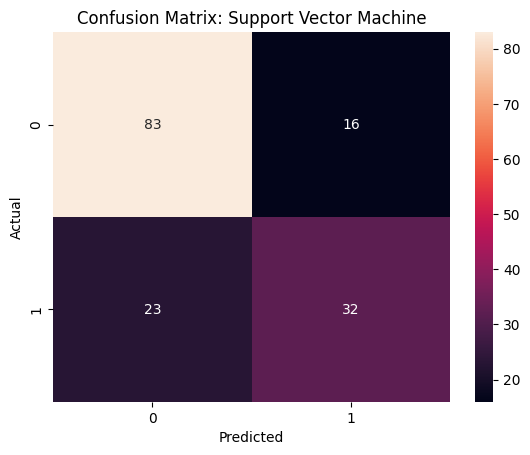

In [7]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f" Model: {name}")
    print(f" Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [8]:
best_model = RandomForestClassifier()
best_model.fit(X_train_scaled, y_train)

joblib.dump(best_model, '../models/trained_model.pkl')
joblib.dump(scaler, '../models/scaler.pkl')

print(" Model and Scaler saved successfully.")


 Model and Scaler saved successfully.


In [9]:

sample = np.array([[2, 120, 70, 30, 100, 25.0, 0.5, 25]])  # Example input

loaded_model = joblib.load('../models/trained_model.pkl')
loaded_scaler = joblib.load('../models/scaler.pkl')

sample_scaled = loaded_scaler.transform(sample)
prediction = loaded_model.predict(sample_scaled)

print("Prediction:", "Diabetic" if prediction[0] == 1 else "Not Diabetic")

Prediction: Not Diabetic
